In [1]:
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd

from sklearn import datasets, metrics

In [2]:
# Input Data
# Removing value 0 as this will yield an exception
y_pred = np.arange(0.01, 1, 0.01)

In [3]:
# Binary Cross Entropy
def BCE(y_pred, y_true):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [4]:
loss = BCE(y_pred, 1)

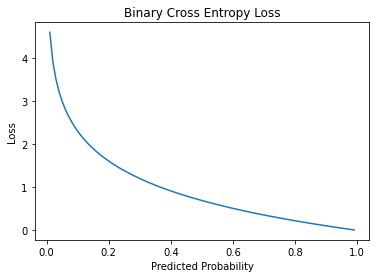

In [5]:
plt.plot(y_pred, loss)
plt.title("Binary Cross Entropy Loss")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.show()

In [6]:
# Loading Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.insert(0, "class", iris.target)

In [7]:
# Model Parameters Definition + Initialization
number_of_features = 4
number_of_outputs = 3

weights = mx.nd.random_normal(shape=(number_of_features, number_of_outputs))
bias = mx.nd.random_normal(shape=number_of_outputs)
print("Weights:")
print(weights)
print()
print("Bias:")
print(bias)

Weights:

[[ 2.2122064   0.7740038   1.0434403 ]
 [ 1.1839255   1.8917114  -1.2347414 ]
 [-1.771029   -0.45138445  0.57938355]
 [-1.856082   -1.9768796  -0.20801921]]
<NDArray 4x3 @cpu(0)>

Bias:

[ 0.2444218  -0.03716067 -0.48774993]
<NDArray 3 @cpu(0)>


In [8]:
# Perceptron Model
def perceptron_with_softmax(weights, bias, features):
    
    output = mx.nd.dot(features, weights) + bias
    return mx.nd.SoftmaxActivation(output)

In [9]:
# Calculate outputs
features = mx.nd.array(iris_df.drop(["class"], axis=1).to_numpy())
preds = perceptron_with_softmax(weights, bias, features).asnumpy()
max_preds = np.argmax(preds, axis=1)

In [10]:
# Groundtruth
expected_outputs = iris_df["class"].to_numpy()

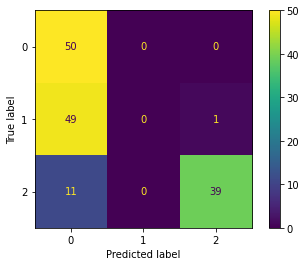

In [11]:
confusion_matrix = metrics.confusion_matrix(expected_outputs, max_preds)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix)
disp.plot()

In [12]:
accuracy = metrics.accuracy_score(expected_outputs, max_preds)
precision = metrics.precision_score(expected_outputs, max_preds, average="macro")
recall = metrics.recall_score(expected_outputs, max_preds, average="macro")
f1_score = metrics.f1_score(expected_outputs, max_preds, average="macro")

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1_score)

Accuracy   : 0.5933333333333334
Precision  : 0.4765151515151515
Recall     : 0.5933333333333334
F1-score   : 0.49722222222222223


/home/andres/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
